## Measuring the number of promoters identified using TSRchtect, and the total gene coverage across the 4 plant experiments (2 species) 

In [2]:
library(ggplot2)

In [3]:
library(GenomicRanges)

Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min

Loading required package: S4Vectors

Attaching packag

In [4]:
library(reshape2)

In [5]:
setwd("/scratch/rtraborn/tsrchitect-figures/figures")

In [6]:
AtEST.file <- "/scratch/rtraborn/tsrchitect-figures/output_files/AtEST_closest_gene_i.txt"

In [7]:
AtESTdist <- read.table(file=AtEST.file, header=FALSE)

In [8]:
ZmEST.file <- "/scratch/rtraborn/tsrchitect-figures/output_files/ZmEST_closest_gene.txt"

In [9]:
ZmESTdist <- read.table(file=ZmEST.file, sep="\t",header=FALSE)

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“EOF within quoted string”Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“number of items read is not a multiple of the number of columns”

In [10]:
head(AtESTdist)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17
Chr1,33113,33114,Chr1.33114.33114.+,2.00,+,Chr1,44676,44787,AT1G01073,.,+,TAIR10,gene,.,ID=AT1G01073;Note=protein_coding_gene;Name=AT1G01073,11563
Chr1,33147,33148,Chr1.33148.33148.+,2.00,+,Chr1,44676,44787,AT1G01073,.,+,TAIR10,gene,.,ID=AT1G01073;Note=protein_coding_gene;Name=AT1G01073,11529
Chr1,46816,46817,Chr1.46817.46817.+,2.00,+,Chr1,52238,54692,AT1G01110,.,+,TAIR10,gene,.,ID=AT1G01110;Note=protein_coding_gene;Name=AT1G01110,5422
Chr1,49270,49283,Chr1.49271.49283.+,0.02,+,Chr1,52238,54692,AT1G01110,.,+,TAIR10,gene,.,ID=AT1G01110;Note=protein_coding_gene;Name=AT1G01110,2956
Chr1,50523,50524,Chr1.50524.50524.+,2.00,+,Chr1,52238,54692,AT1G01110,.,+,TAIR10,gene,.,ID=AT1G01110;Note=protein_coding_gene;Name=AT1G01110,1715
Chr1,51176,51191,Chr1.51177.51191.+,-0.74,+,Chr1,52238,54692,AT1G01110,.,+,TAIR10,gene,.,ID=AT1G01110;Note=protein_coding_gene;Name=AT1G01110,1048


In [11]:
head(ZmESTdist)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17
1,9627,9628,1.9628.9628.+,2,+,1,136306,138929,gene:GRMZM2G093399,.,+,ensembl,gene,.,ID=gene:GRMZM2G093399;assembly_name=AGPv3;biotype=protein_coding;logic_name=genebuilder;version=1,126679
1,60112,60113,1.60113.60113.+,2,+,1,136306,138929,gene:GRMZM2G093399,.,+,ensembl,gene,.,ID=gene:GRMZM2G093399;assembly_name=AGPv3;biotype=protein_coding;logic_name=genebuilder;version=1,76194
1,260376,260377,1.260377.260377.+,2,+,1,272524,274767,gene:GRMZM2G023863,.,+,ensembl,gene,.,ID=gene:GRMZM2G023863;assembly_name=AGPv3;biotype=protein_coding;logic_name=genebuilder;version=2,12148
1,367700,367701,1.367701.367701.+,2,+,1,372537,374866,gene:GRMZM2G137697,.,+,ensembl,gene,.,ID=gene:GRMZM2G137697;assembly_name=AGPv3;biotype=protein_coding;description=30S ribosomal protein S15%2C chloroplastic [Source:UniProtKB/Swiss-Prot%3BAcc:P17703];logic_name=genebuilder;version=1,4837
1,368198,368199,1.368199.368199.+,2,+,1,372537,374866,gene:GRMZM2G137697,.,+,ensembl,gene,.,ID=gene:GRMZM2G137697;assembly_name=AGPv3;biotype=protein_coding;description=30S ribosomal protein S15%2C chloroplastic [Source:UniProtKB/Swiss-Prot%3BAcc:P17703];logic_name=genebuilder;version=1,4339
1,368897,368898,1.368898.368898.+,2,+,1,372537,374866,gene:GRMZM2G137697,.,+,ensembl,gene,.,ID=gene:GRMZM2G137697;assembly_name=AGPv3;biotype=protein_coding;description=30S ribosomal protein S15%2C chloroplastic [Source:UniProtKB/Swiss-Prot%3BAcc:P17703];logic_name=genebuilder;version=1,3640


In [12]:
colnames(AtESTdist) <- c("chr","start1","end1", "ID1", "score", "strand1", "chr2", "start2", "end2", "ID2", "score2", "strand2", "assemblyI\
D", "type", "score3", "ID_string", "distance")

In [13]:
colnames(ZmESTdist) <- c("chr","start1","end1", "ID1", "score", "strand1", "chr2", "start2", "end2", "ID2", "score2", "strand2", "assemblyI\
D", "type", "score3", "ID_string", "distance")

In [14]:
head(AtESTdist)

chr,start1,end1,ID1,score,strand1,chr2,start2,end2,ID2,score2,strand2,assemblyI D,type,score3,ID_string,distance
Chr1,33113,33114,Chr1.33114.33114.+,2.00,+,Chr1,44676,44787,AT1G01073,.,+,TAIR10,gene,.,ID=AT1G01073;Note=protein_coding_gene;Name=AT1G01073,11563
Chr1,33147,33148,Chr1.33148.33148.+,2.00,+,Chr1,44676,44787,AT1G01073,.,+,TAIR10,gene,.,ID=AT1G01073;Note=protein_coding_gene;Name=AT1G01073,11529
Chr1,46816,46817,Chr1.46817.46817.+,2.00,+,Chr1,52238,54692,AT1G01110,.,+,TAIR10,gene,.,ID=AT1G01110;Note=protein_coding_gene;Name=AT1G01110,5422
Chr1,49270,49283,Chr1.49271.49283.+,0.02,+,Chr1,52238,54692,AT1G01110,.,+,TAIR10,gene,.,ID=AT1G01110;Note=protein_coding_gene;Name=AT1G01110,2956
Chr1,50523,50524,Chr1.50524.50524.+,2.00,+,Chr1,52238,54692,AT1G01110,.,+,TAIR10,gene,.,ID=AT1G01110;Note=protein_coding_gene;Name=AT1G01110,1715
Chr1,51176,51191,Chr1.51177.51191.+,-0.74,+,Chr1,52238,54692,AT1G01110,.,+,TAIR10,gene,.,ID=AT1G01110;Note=protein_coding_gene;Name=AT1G01110,1048


In [15]:
dim(AtESTdist)

[1] 15928    17

In [16]:
is(AtESTdist$distance)

[1] "integer"             "numeric"             "vector"             
[4] "data.frameRowLabels" "integer_OR_Linteger" "atomic"             
[7] "EnumerationValue"    "vector_OR_factor"

In [17]:
a <- ggplot(AtESTdist, aes(distance))

Warning message:
“Removed 2116 rows containing non-finite values (stat_bin).”Warning message:
“Removed 1 rows containing missing values (geom_bar).”

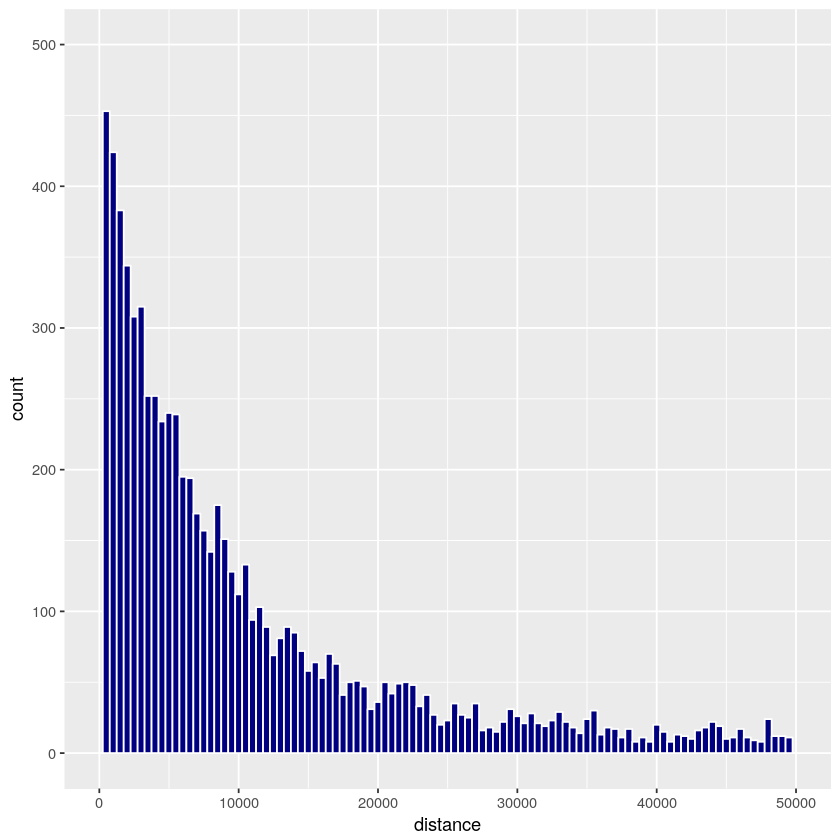

In [18]:
a + geom_histogram(binwidth=500, colour="white",fill="navy") + scale_x_continuous(limit=c(0,50000)) + scale_y_continuous(limit=c(0,500))

In [19]:
ggsave("AtEST_closest_hist.png")

Saving 6.67 x 6.67 in image
Warning message:
“Removed 2116 rows containing non-finite values (stat_bin).”Warning message:
“Removed 1 rows containing missing values (geom_bar).”

In [20]:
dim(ZmESTdist)

[1] 16082    17

In [21]:
z <- ggplot(ZmESTdist, aes(distance))

Warning message:
“Removed 5488 rows containing non-finite values (stat_bin).”Warning message:
“Removed 1 rows containing missing values (geom_bar).”

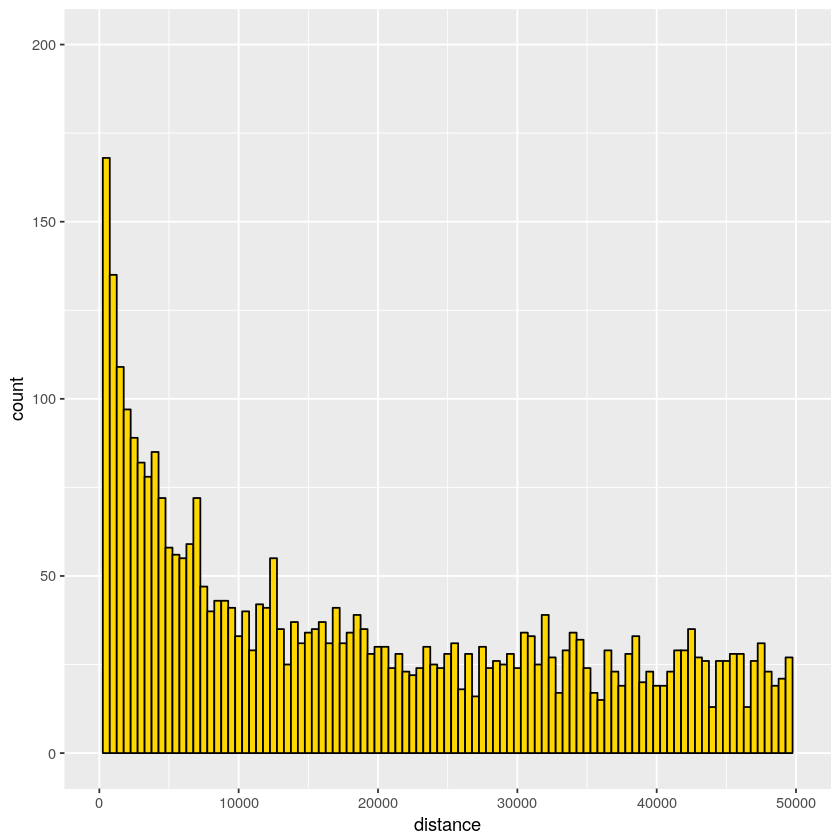

In [22]:
z + geom_histogram(binwidth=500, colour="black",fill="gold") + scale_x_continuous(limit=c(0,50000)) + scale_y_continuous(limit=c(0,200))

In [23]:
ggsave("ZmEST_closest_hist.png")

Saving 6.67 x 6.67 in image
Warning message:
“Removed 5488 rows containing non-finite values (stat_bin).”Warning message:
“Removed 1 rows containing missing values (geom_bar).”

In [141]:
n.prom <- matrix(NA, nrow=4, ncol=2)

In [142]:
under200 <- length(which(AtESTdist[,17]<200))

In [143]:
under500 <- length(which(AtESTdist[,17]<500))

In [144]:
under1000 <- length(which(AtESTdist[,17]<1000))

In [28]:
above1k  <- length(which(AtESTdist[,17]>=1000))

In [145]:
under200.ind <- which(AtESTdist[,17]<200)

In [146]:
under500.ind <- which(AtESTdist[,17]<500)

In [147]:
under1k.ind <- which(AtESTdist[,17]<1000)

In [148]:
above1k.ind <- which(AtESTdist[,17]>=1000)

In [149]:
dim(AtESTdist)

[1] 15928    17

In [150]:
prom.cat <- matrix(NA, nrow=nrow(AtESTdist), ncol=2)

In [151]:
prom.cat[above1k.ind,1] <- "above1k"

In [152]:
prom.cat[under1k.ind,1] <- "under1k"

In [153]:
prom.cat[under500.ind,1] <- "under500"

In [154]:
prom.cat[under200.ind,1] <- "under200"

In [155]:
colnames(prom.cat) <- c("group","distance")

In [156]:
prom.cat <- as.data.frame(prom.cat)

In [157]:
above1k.c <- length(which(as.character(prom.cat$group)=="above1k"))

In [158]:
under1k.c <- length(which(as.character(prom.cat$group)=="under1k"))

In [159]:
under500.c <- length(which(as.character(prom.cat$group)=="under500"))

In [160]:
under200.c <- length(which(as.character(prom.cat$group)=="under200"))

In [161]:
above1k.c

[1] 8951

In [162]:
under1k.c

[1] 426

In [163]:
under500.c

[1] 319

In [165]:
under200.c

[1] 6232

In [166]:
prom.cat[,2] <- AtESTdist$distance

In [167]:
head(prom.cat)

group,distance
above1k,11563
above1k,11529
above1k,5422
above1k,2956
above1k,1715
above1k,1048


In [168]:
prom.cat$distance <- as.numeric(unlist(prom.cat$distance))

In [169]:
prom.cat$group <- factor(prom.cat$group, levels = prom.cat$group[order(prom.cat$distance)])

ERROR: Error in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, : factor level [2] is duplicated


In [170]:
prom.cat$org <- "Arabidopsis"

In [171]:
is(prom.cat$distance)

[1] "numeric"          "vector"           "atomic"           "EnumerationValue"
[5] "vector_OR_factor"

In [172]:
n.prom.z <- matrix(NA, nrow=4, ncol=2)

In [173]:
under200.z <- length(which(ZmESTdist[,17]<200))

In [174]:
under500.z <- length(which(ZmESTdist[,17]<500))

In [175]:
under1000.z <- length(which(ZmESTdist[,17]<1000))

In [176]:
above1k.z  <- length(which(ZmESTdist[,17]>1000))

In [177]:
under200.ind.z <- which(ZmESTdist[,17]<200)

In [178]:
under500.ind.z <- which(ZmESTdist[,17]<500)

In [179]:
under1k.ind.z <- which(ZmESTdist[,17]<1000)

In [180]:
above1k.ind.z <- which(ZmESTdist[,17]>=1000)

In [181]:
prom.cat.z <- matrix(NA, nrow=nrow(ZmESTdist), ncol=2)

In [182]:
prom.cat.z[above1k.ind.z,1] <- "above1k"

In [183]:
prom.cat.z[under1k.ind.z,1] <- "under1k"

In [184]:
prom.cat.z[under500.ind.z,1] <- "under500"

In [185]:
prom.cat.z[under100.ind.z,1] <- "under200"

In [186]:
prom.cat.z[,2] <- ZmESTdist$distance

In [187]:
colnames(prom.cat.z) <- c("group","distance")

In [188]:
dim(prom.cat.z)

[1] 16082     2

In [189]:
prom.cat.z <- as.data.frame(prom.cat.z)

In [190]:
prom.cat.z$org <- "Maize"

In [191]:
head(prom.cat.z)

group,distance,org
above1k,126679,Maize
above1k,76194,Maize
above1k,12148,Maize
above1k,4837,Maize
above1k,4339,Maize
above1k,3640,Maize


In [192]:
above1k.z <- length(which(as.character(prom.cat.z$group)=="above1k"))

In [193]:
under1k.z <- length(which(as.character(prom.cat.z$group)=="under1k"))

In [194]:
under500.z <- length(which(as.character(prom.cat.z$group)=="under500"))

In [195]:
under200.z <- length(which(as.character(prom.cat.z$group)=="under200"))

In [196]:
length(na.omit(prom.cat.z$group))

[1] 16081

In [197]:
prom.count.at <- matrix(NA, ncol=3, nrow=4)

In [198]:
colnames(prom.count.at) <- c("group","number","org")

In [199]:
prom.count.at[,1] <- c("under200", "under500", "under1k", "above1k")

In [200]:
prom.count.at[,2] <- c(under200.c, under500.c, under1k.c, above1k.c)

In [201]:
prom.count.at <- as.data.frame(prom.count.at)

In [202]:
prom.count.at$group <- factor(prom.count.at$group, levels = prom.count.at$group[order(prom.count.at$number)])

In [203]:
prom.count.at$org <- "Arabidopsis"

In [204]:
prom.count.at$number <- as.numeric(unlist(as.character(prom.count.at$number)))

In [205]:
head(prom.count.at)

group,number,org
under200,6232,Arabidopsis
under500,319,Arabidopsis
under1k,426,Arabidopsis
above1k,8951,Arabidopsis


In [206]:
prom.count.z <- matrix(NA, ncol=3, nrow=4)

In [207]:
colnames(prom.count.z) <- c("group","number","org")

In [208]:
prom.count.z[,1] <- c("under200", "under500", "under1k", "above1k")

In [209]:
prom.count.z[,2] <- c(under200.z, under500.z, under1k.z, above1k.z)

In [210]:
prom.count.z <- as.data.frame(prom.count.z)

In [211]:
prom.count.z$group <- factor(prom.count.z$group, levels = prom.count.z$group[order(prom.count.z$number)])

In [212]:
prom.count.z$org <- "Maize"

In [213]:
prom.count.all <- rbind(prom.count.at, prom.count.z)

In [214]:
prom.count.z

group,number,org
under200,6806,Maize
under500,211,Maize
under1k,140,Maize
above1k,8924,Maize


In [215]:
prom.count.z$group

[1] under200 under500 under1k  above1k 
Levels: under1k under500 under200 above1k

In [216]:
prom.count.all

group,number,org
under200,6232,Arabidopsis
under500,319,Arabidopsis
under1k,426,Arabidopsis
above1k,8951,Arabidopsis
under200,6806,Maize
under500,211,Maize
under1k,140,Maize
above1k,8924,Maize


In [217]:
prom.count.all$number <- as.numeric(unlist(as.character(prom.count.all$number)))

In [218]:
is(prom.count.all$number)

[1] "numeric"          "vector"           "atomic"           "EnumerationValue"
[5] "vector_OR_factor"

In [219]:
prom.count.all$org

[1] "Arabidopsis" "Arabidopsis" "Arabidopsis" "Arabidopsis" "Maize"      
[6] "Maize"       "Maize"       "Maize"

In [220]:
prom.count.z$number <- as.numeric(unlist(as.character(prom.count.z$number)))

In [221]:
c <- ggplot(prom.count.z, aes(y=number, x=org, fill=group))

In [222]:
cc <- c + geom_bar(stat="identity")                                                               

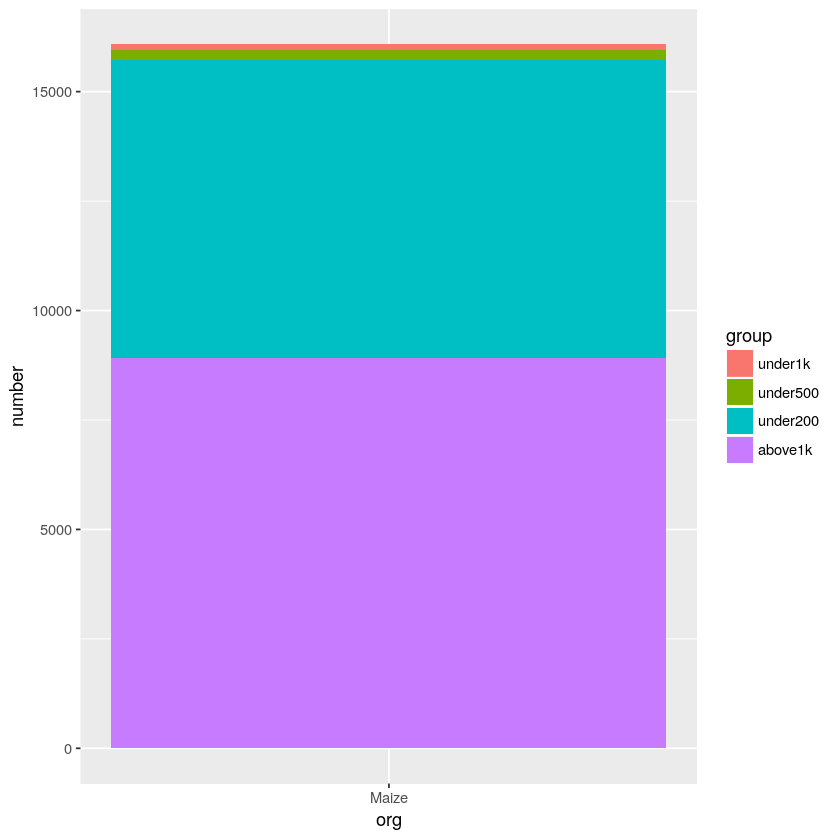

In [223]:
cc

In [224]:
ggsave(file="ZmEST_distance_classes.png")

Saving 6.67 x 6.67 in image


In [225]:
d <- ggplot(prom.count.all, aes(y=number, x=org, fill=group))

In [226]:
dd <- d + geom_bar(stat="identity")                                                               

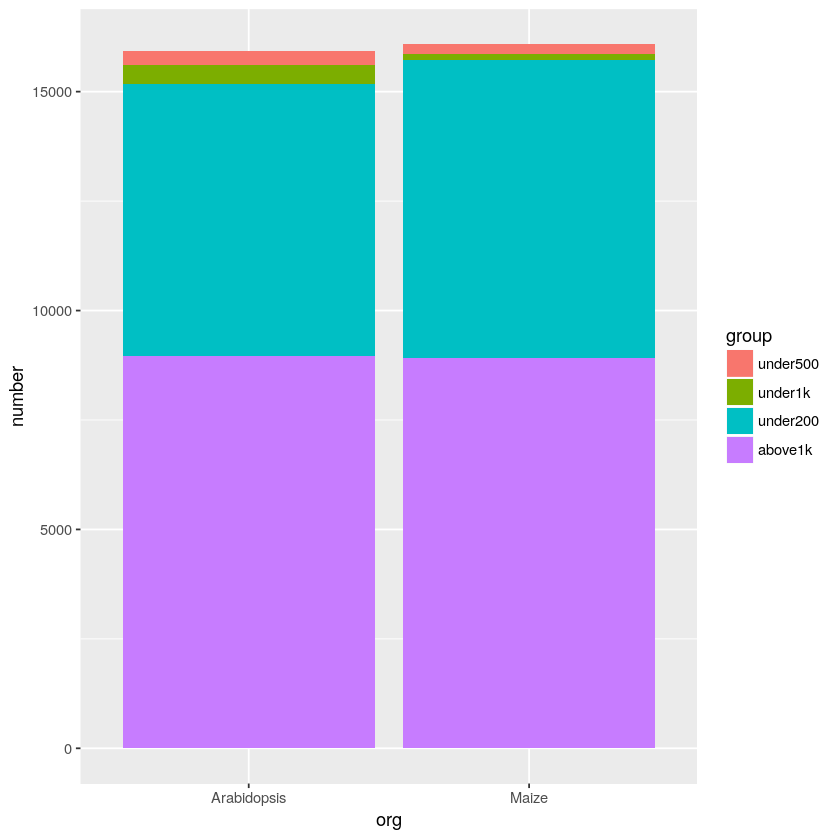

In [227]:
dd

In [228]:
ggsave(file="EST_distance_classes_combined.png")

Saving 6.67 x 6.67 in image
